# 주피터 노트북

코드를 작성하고 실행시키면

코드가 Jupyter 서버로 전송되고

실행된 결과가 이 페이지에 보여집니다.

In [1]:
print("hello Keras")

hello Keras


# 첫 Keras로 구현한 DNN

y = x*x 함수

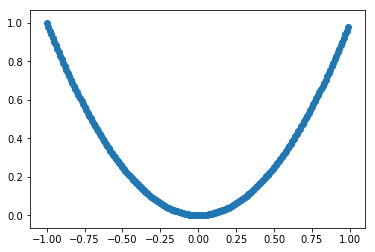

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)

## 필요한 라이브러리 임포팅

- numpy : 딥러닝에서 표준으로 사용되는 데이터 담는 그릇
- pandas : 데이터 탐색, 전처리 하기 위한
- matplot : 그래프 그려주는
- tensorflow : 실제 딥러닝 실행되는 백엔드 프레임웤
- keras : 편의성 편한 딥러닝 프레임웤

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

## 모델 정의

- 입력은 값 하나, 출력도 값 하나. 그래서 입력층의 노드가 1개, 출력층의 노드도 1개
- 중간의 은닉층은 2개이다. 각각 10개의 노드를 갖느다.

In [5]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## 사용될 GD와 비용 함수 정의

학습을 위해서는 다음 2가지 설정이 필요하다.

- optimizer : 기반적인 경가강하방법을 개선한 다양한 방법이 있다. 이를 optimizer라 부른다. 본 코드에서는 이중 SGD(Stochastic GD)를 사용

- 비용 함수 : 학습이 진행되는 방향을 나타내는 수치. 여기서는 학습에 사용되는 y값과 실제 출력값의 MSE(mean squared error)를 사용하도록 설정했다.

In [0]:
model.compile(optimizer="SGD", loss="mse")

## 학습 실행

1000회 반복 할 것이다. 

batch_size는 오로지 GPU 사용의 최대 효율을 위한 것이다. 한번에 잔뜩 보내서 빠르게 하자.

In [7]:
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

## 학습된 결과 사용

학습된 모델은 함수 이다.

함수에 값을 넣어서 출력을 구할 수 있다.


In [0]:
y_ = model.predict(x)

## 결과 그래프로 보기

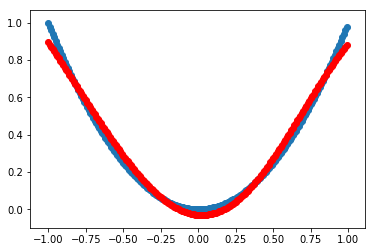

In [9]:
plt.scatter(x,y) # 정답
plt.scatter(x,y_,color='r') # 결과
plt.show()

## 코드를 전부 모아 보면

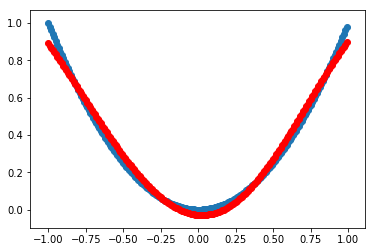

In [10]:
# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

# 컴파일 : 모델 + optimizer + loss
model.compile(optimizer="SGD", loss="mse")

# 학습
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

# 예측
y_ = model.predict(x)

# 결과 그래프로 보기
plt.scatter(x,y) # 정답
plt.scatter(x,y_,color='r') # 결과
plt.show()

# 2번째 DNN. IRIS 분류


## 데이터 가져오기

In [6]:
!wget https://github.com/dhrim/oss_university/blob/master/material/iris.csv

--2019-10-15 13:25:03--  hhttps://github.com/dhrim/oss_university/blob/master/materialiris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2720 (2.7K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   2.66K  --.-KB/s    in 0s      

2019-10-15 13:25:03 (53.0 MB/s) - ‘iris.csv’ saved [2720/2720]



## 데이터 살펴 보기

1개의 줄이 1개의 데이터에 해당한다.

4개의 값(septal_length, septal_width, petal_length, petal_width)을 입력으로 하여

3개의 값(setosa, versicolor, virginica)을 출력으로 하여 학습하면 된다.

<br>
3개의 출력 값 중, 가장 큰 것이 qnsfbehls rufrhkdlek.


In [9]:
iris = pd.read_csv("iris.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,0,0,1
1,5.0,2.3,3.3,1.0,0,1,0
2,4.9,2.5,4.5,1.7,0,0,1
3,4.9,3.1,1.5,0.1,1,0,0
4,5.7,3.8,1.7,0.3,1,0,0


## 데이터 준비

pandas로 읽을 것을 numpy에 담았고

4개의 컬럼은 입력 x이고, 3개의 컬럼은 출력 y 이다.


In [0]:
data = iris.to_numpy()

x = data[:,:4] # 앞의 4개 컬럼
y = data[:,4:] # 앞 4개 컬럼 뒤 3개

split_index = 100

# 학습과 테스트에 사용할 데이터를 분류한다.
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

## 모델 정의

입력층은 4개의 입력을 받는 4개의 노드를 갖고

출력층은 3개의 값을 출력하는 3개의 노드를 갖는다.

<br>

마지막 출력층은 3개의 출력 중 가장 큰값만 추리기 위한 softmax를 사용한다.


In [0]:
model = keras.Sequential([
    keras.layers.Input(4),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

## optimizer와 loss

optimizer는 그대로 SGD를 사용

loss는 3개의 출력중 가장 큰값으로 분류할 때 편의를 위핸 keras에서 지원하는 categorical_crossentropy를 사용한다.

<br>

그리고 정확도를 보기 위해 역시 keras에서 지원하는 accuracy를 설정해 준다.


In [0]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 학습

In [35]:
model.fit(train_x, train_y, epochs=200, verbose=0)

## 성능 확인

특이한 것은, 학습에 사용하지 않은 별개의 데이터 test_x, test_y를 사용하여 성능을 확인한다.


In [36]:
loss, acc = model.evaluate(test_x, test_y)

print("loss :", loss)
print("acc :", acc)

20/20 [==============================] - 0s 2ms/sample - loss: 0.0128 - acc: 1.0000
loss : 0.012839801609516144
acc : 1.0


## 뷴류기 함수 호출

학습이 완료된 model에 입력값을 주어 출력을 얻는다.


In [37]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.9921298e-01 7.8705413e-04 1.3571800e-11]
 [5.7107862e-03 9.9353880e-01 7.5046672e-04]
 [9.9589300e-01 4.1070008e-03 1.3874040e-09]
 [8.7609142e-04 9.9841094e-01 7.1287301e-04]
 [9.9956793e-01 4.3200998e-04 2.2904957e-12]
 [9.9969327e-01 3.0673659e-04 9.6955311e-13]
 [9.9983513e-01 1.6485828e-04 1.6791821e-13]
 [9.9979061e-01 2.0942034e-04 4.1575036e-13]
 [2.9442986e-03 9.9677950e-01 2.7631337e-04]
 [9.9927551e-01 7.2454469e-04 9.9639411e-12]
 [3.8492139e-08 1.7719218e-01 8.2280773e-01]
 [1.4782154e-04 9.9646425e-01 3.3878973e-03]
 [9.9914539e-01 8.5463101e-04 1.3292009e-11]
 [1.0868524e-14 3.5265097e-05 9.9996471e-01]
 [9.9958211e-01 4.1791389e-04 2.1075633e-12]
 [1.6885022e-05 9.6801454e-01 3.1968631e-02]
 [2.6843889e-04 9.9843401e-01 1.2975279e-03]
 [9.9888951e-01 1.1104604e-03 4.6604193e-11]
 [9.9926323e-01 7.3679601e-04 1.2249725e-11]
 [2.0292241e-03 9.9705374e-01 9.1699592e-04]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]
